## Comparaison de notre var importance avec celui de sklearn(logistic regression)

Jeu test :
Student Performance, variable cible : "Access_to_Resources"

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer



In [ ]:
# Variable Importance (sorted):             ## Output from our model
# quantitative.Exam_Score :  8.4411
# quantitative.Attendance :  4.826
# quantitative.Hours_Studied :  3.5822 
# qualitative.Parental_InvolvementLow :  3.1441
# qualitative.Internet_AccessYes :  1.9472
# qualitative.Motivation_LevelLow :  1.93

# Résutlats du model de sklearn :                   # var importance of sklearn model LogisticRegression feature_importance(via les coefficients)
# Exam_Score                               6.296300
# Attendance                               3.668043
# Hours_Studied                            2.815627
# Parental_Involvement_High                1.599703
# Parental_Involvement_Low                 1.588960
# Previous_Scores                          1.112760
# Tutoring_Sessions                        0.965715
# Parental_Education_Level_Postgraduate    0.939860

Accuracy: 0.8164397377710539
F1 Score (Weighted): 0.8087905246161629
              precision    recall  f1-score   support

        High       0.97      0.57      0.72       621
         Low       0.95      0.82      0.88       381
      Medium       0.74      0.97      0.84       981

    accuracy                           0.82      1983
   macro avg       0.89      0.79      0.81      1983
weighted avg       0.85      0.82      0.81      1983



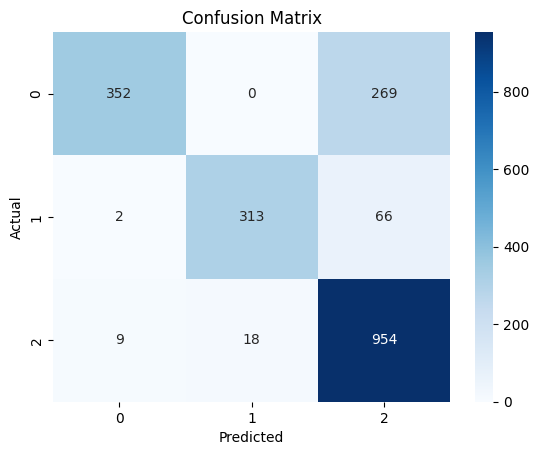

Feature Importance (sorted):
Exam_Score                               6.296300
Attendance                               3.668043
Hours_Studied                            2.815627
Parental_Involvement_High                1.599703
Parental_Involvement_Low                 1.588960
Previous_Scores                          1.112760
Tutoring_Sessions                        0.965715
Parental_Education_Level_Postgraduate    0.939860
Distance_from_Home_Far                   0.876638
Teacher_Quality_High                     0.863459
Peer_Influence_Negative                  0.842130
Motivation_Level_High                    0.838916
Internet_Access_Yes                      0.813920
Peer_Influence_Positive                  0.812492
Internet_Access_No                       0.811548
Motivation_Level_Low                     0.802881
Learning_Disabilities_No                 0.796555
Family_Income_High                       0.795200
Learning_Disabilities_Yes                0.794183
Family_Income_Low    

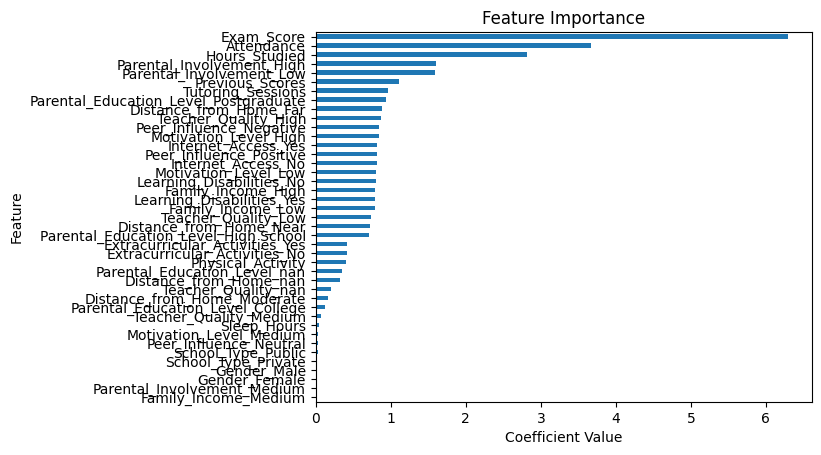

In [12]:
# Charger les données
data_path = "../data/StudentPerformanceFactors.csv"  
data = pd.read_csv(data_path)

# S'assurer que la variable cible est un facteur
data['Access_to_Resources'] = data['Access_to_Resources'].astype('category')

# Séparer les caractéristiques et la variable cible
y = data['Access_to_Resources']
X = data.drop('Access_to_Resources', axis=1)

# Identifier les colonnes numériques et catégorielles
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object', 'category']).columns

# Créer les transformations pour les colonnes numériques et catégorielles
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combiner les transformations en un préprocesseur
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Créer un pipeline avec le préprocesseur et le modèle de régression logistique
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entraîner le modèle
model.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = model.predict(X_test)

# Calculer et afficher l'accuracy et le F1-score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Accuracy: {accuracy}")
print(f"F1 Score (Weighted): {f1}")

# Afficher le rapport de classification
print(classification_report(y_test, y_pred))

# Afficher la matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Extraire les coefficients du modèle
classifier = model.named_steps['classifier']
preprocessor = model.named_steps['preprocessor']

# Obtenir les noms des nouvelles colonnes après transformation
onehot_columns = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_features)
all_columns = np.append(numeric_features, onehot_columns)

coefficients = classifier.coef_[0]
feature_importance = pd.Series(coefficients, index=all_columns)
# convert featture importance into absolute values
feature_importance = feature_importance.abs()

# Sort and display the feature importances
feature_importance_sorted = feature_importance.sort_values(ascending=False)
print("Feature Importance (sorted):")
print(feature_importance_sorted)


# Visualiser les coefficients
feature_importance.sort_values().plot(kind='barh')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()